<B> Checking if python is running in the required environment

In [1]:
import sys
sys.executable

'C:\\Users\\sidew\\anaconda3\\envs\\geo\\python.exe'

<B> Importing the required libraries

In [1]:
import geopandas as gpd
import rasterio as rio
import os
import numpy as np
import pandas as pd
import cv2
from rasterio.plot import show
import matplotlib.pyplot as plt

<B> Setting the directory where all the required files are present

In [2]:
os.chdir("C:\\Users\\sidew\\Desktop\\LandSat/Christy Heaton Map It\\Auroral_Activity/")

<B> reading the world shapefile that comes pre-loaded with the GeoPandas module

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<B> Checking the co-ordinate reference system for the file

In [4]:
world.crs
#EPSG 4326

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<B> Plotting the shapefile using the plot function from descartes

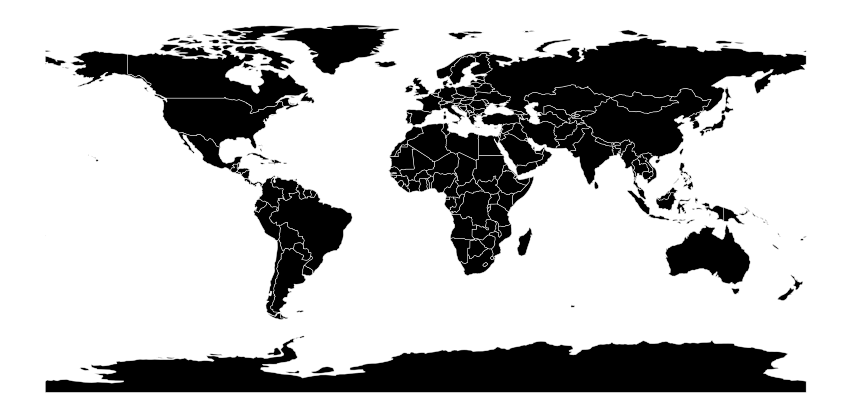

In [9]:
world.plot(color='black', linewidth=0.5, edgecolor='white', figsize=(15,10)).set_axis_off()

<B> loading in data about major cities around the world and their populations along with co-ordinates

In [378]:
cities = gpd.read_file('C:\\Users\\sidew\\Desktop\\LandSat/Christy Heaton Map It\\Auroral_Activity/population/ne_50m_populated_places.shp')
cities = cities[['NAME','geometry','POP2020','MEGACITY']]
cities.head()

,NAME,geometry,POP2020,MEGACITY
0,Bombo,POINT (32.53330 0.58330),0.0,0
1,Fort Portal,POINT (30.27500 0.67100),0.0,0
2,Potenza,POINT (15.79900 40.64200),0.0,0
3,Campobasso,POINT (14.65600 41.56300),0.0,0
4,Aosta,POINT (7.31500 45.73700),0.0,0


<B> plotting this shapefile to take a look

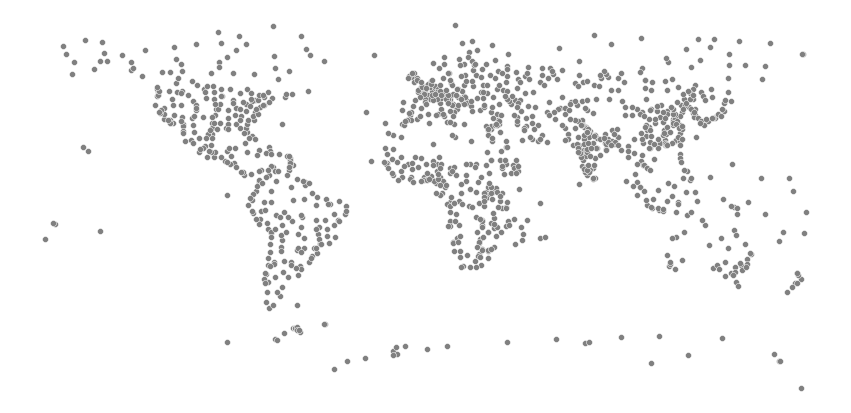

In [78]:
cities.plot(color='grey', linewidth=0.5, edgecolor='white', figsize=(15,10)).set_axis_off()

<B> Similar exercise with the aurora dataset depicting regions in the world where we might expect to see an Aurora

In [15]:
aurora = gpd.read_file('C:\\Users\\sidew\\Desktop\\LandSat/Christy Heaton Map It\\Auroral_Activity/Image_Overlays-polygon.shp')

In [79]:
aurora = aurora[['Name','geometry']]
aurora.head()

,Name,geometry
0,Aurora Borealis,"POLYGON ((180.00000 90.00000, 180.00000 34.000..."
1,Aurora Australis,"POLYGON ((180.00000 -34.00000, 180.00000 -90.0..."


<AxesSubplot:>

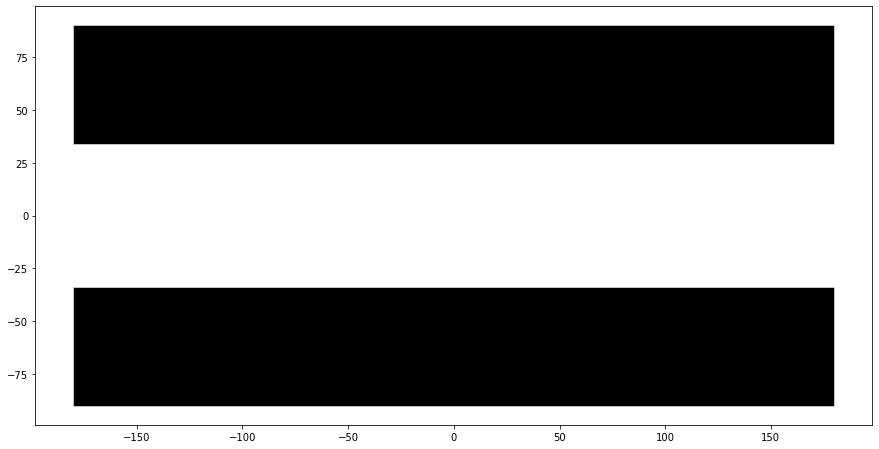

In [80]:
aurora.plot(color='black', linewidth=0.5, edgecolor='white', figsize=(15,10))

### Layering the cities and the aurora plots on top of the world countries plot, to obtain a map of aurora viewing locations

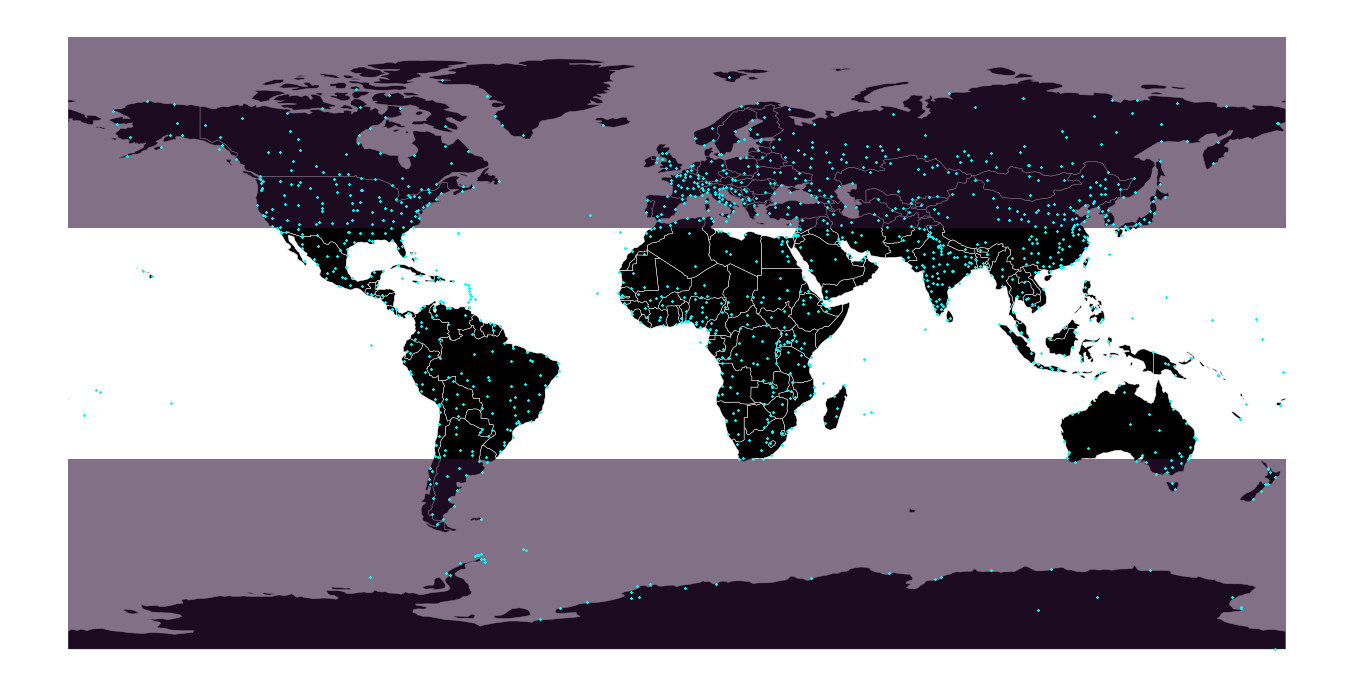

In [208]:
base = world.plot(color='black', linewidth=0.5, edgecolor='white', figsize=(24,20))
aurora.plot(ax=base, cmap='twilight_shifted', alpha=0.6)
cities.plot(ax = base,marker = '*', color = 'cyan', markersize = 4)
base.set_axis_off()
# base.get_legend().set_bbox_to_anchor((.05,.965))

<B> Looks a bit messy, so we isolate the cities that lie in the aurora regions, and exclude the rest - done by using the 
sjoin function in GeoPandas

In [291]:
cities_of_interest = gpd.sjoin(cities, aurora, how='inner', op='intersects')
cities_of_interest = cities_of_interest[['NAME','POP2020','MEGACITY','Name','geometry']].reset_index(drop = True)
cities_of_interest.columns = ['City','population','megacity','Aurora','geometry']

In [293]:
cities_of_interest.head()

,City,population,megacity,Aurora,geometry
0,Potenza,0.0,0,Aurora Borealis,POINT (15.79900 40.64200)
1,Campobasso,0.0,0,Aurora Borealis,POINT (14.65600 41.56300)
2,Aosta,0.0,0,Aurora Borealis,POINT (7.31500 45.73700)
3,Mariehamn,0.0,0,Aurora Borealis,POINT (19.94900 60.09700)
4,Vatican City,0.0,0,Aurora Borealis,POINT (12.45339 41.90328)


<B> Further, we divide these cities based on the size of their populations.

In [229]:
coi_1k = cities_of_interest[(cities_of_interest['population'] <= 1000)]
coi_10k = cities_of_interest[(cities_of_interest['population'] > 1000) & (cities_of_interest['population'] <= 10000)]
coi_m = cities_of_interest[cities_of_interest['population'] > 10000]

<B> Now, plot these cities in the regions of interest with special markers for each population range

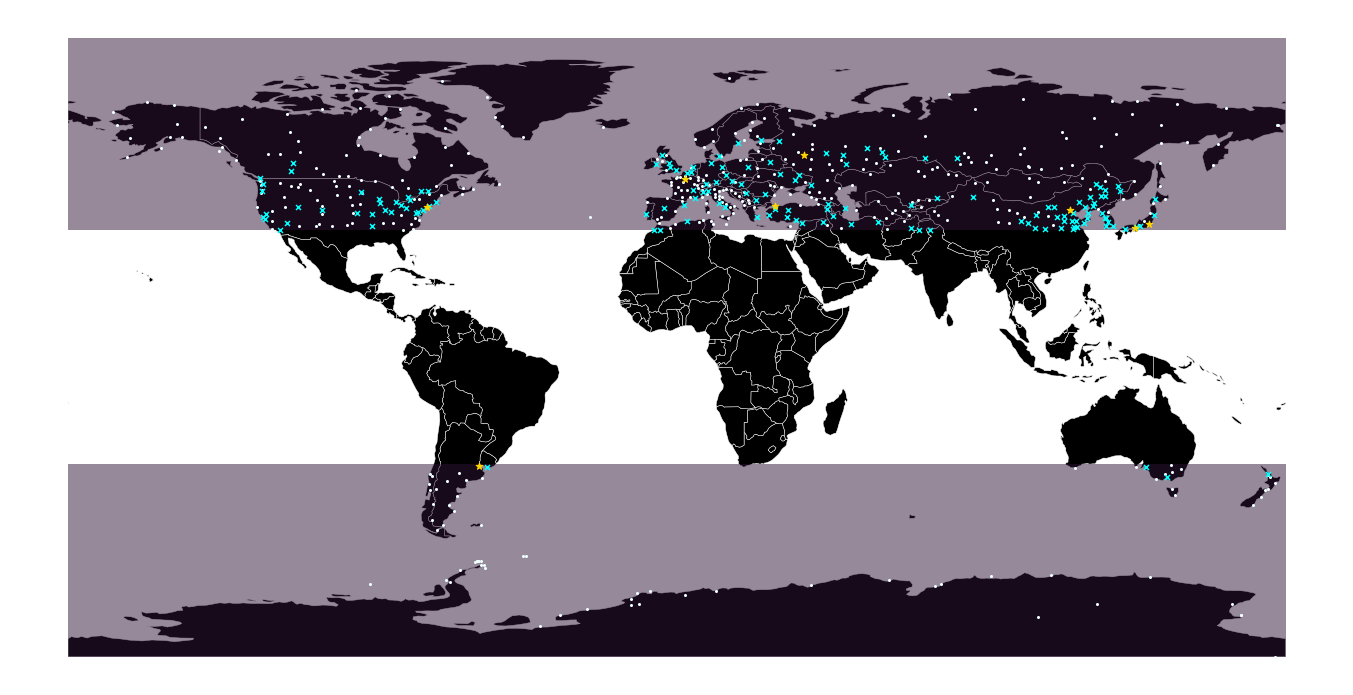

In [335]:
base = world.plot(color='black', linewidth=0.5, edgecolor='white', figsize=(24,20))
aurora.plot(ax=base, cmap='twilight_shifted', alpha=0.5)
coi_1k.plot(ax = base, color = 'azure', markersize = 4,legend = True)
coi_10k.plot(ax = base,marker = 'x', color = 'cyan', markersize = 25,legend = True)
coi_m.plot(ax = base,marker = '*', color = 'gold', markersize = 50)
base.set_axis_off()
# base.get_legend().set_bbox_to_anchor((.05,.965))

### It still feels a bit cluttered, so we plot the continents individually for a clearer picture

<B> Map for the Americas - Different colours depict the different population ranges. The sizes correspond to population sizes within these ranges

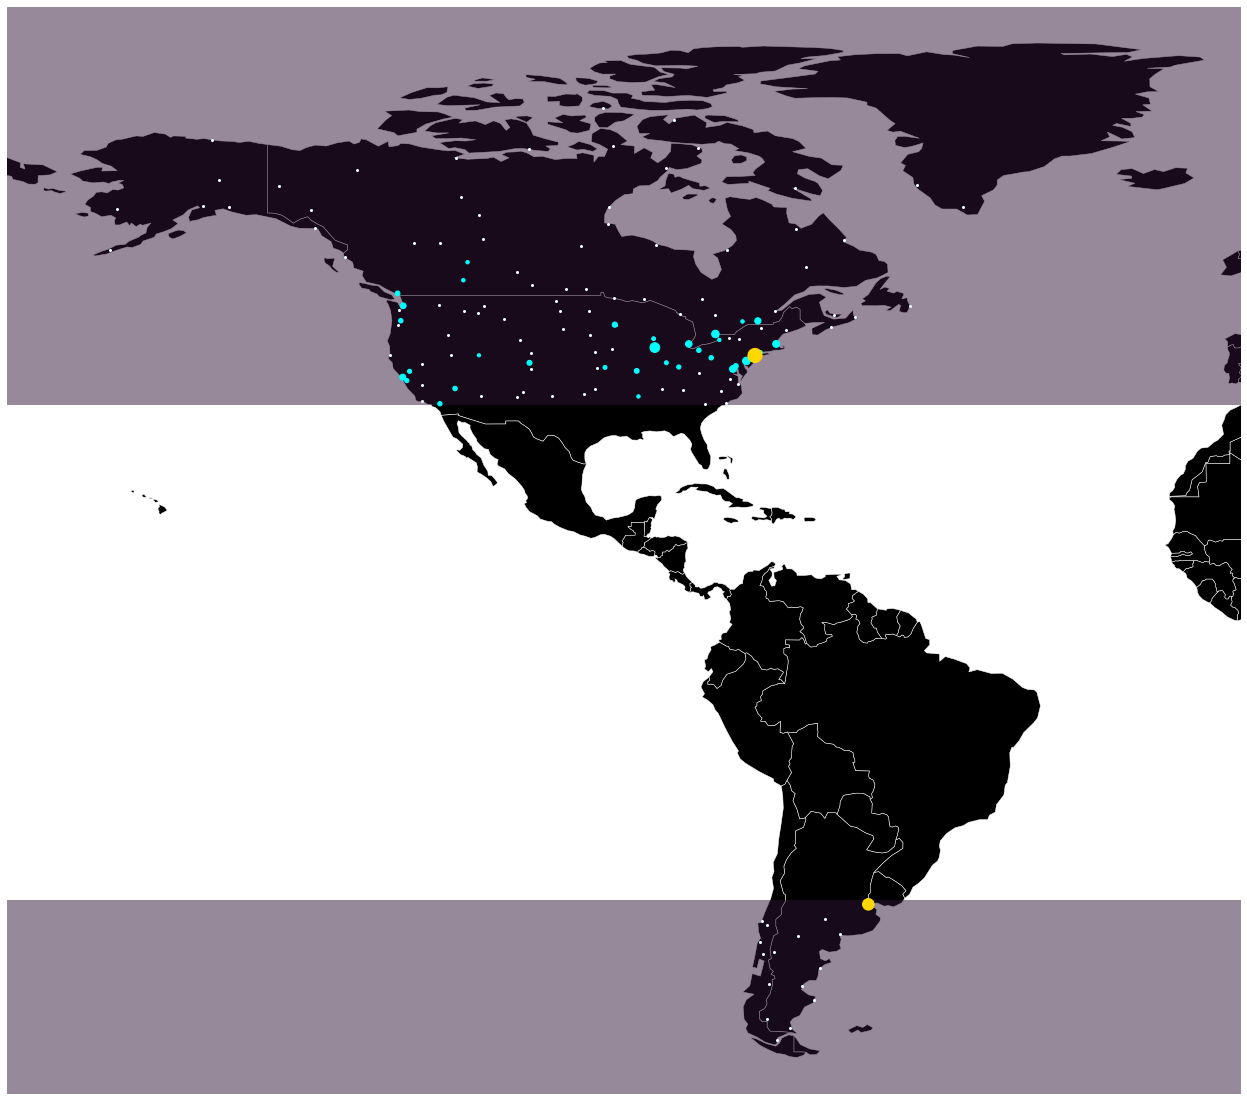

In [336]:
Americas = world[(world['continent'] == 'North America') | (world['continent'] == 'South America')][['continent','name','geometry']]

cities_of_interest_americas = gpd.sjoin(cities_of_interest, Americas, how = 'inner', op = 'intersects')
cities_of_interest_americas = cities_of_interest_americas[['City','population','megacity','Aurora','continent','name','geometry']]
cities_of_interest_americas.columns = ['city','population','megacity','Aurora','continent','country','geometry']

coi_1k_americas = cities_of_interest_americas[(cities_of_interest_americas['population'] <= 1000)]
coi_10k_americas = cities_of_interest_americas[(cities_of_interest_americas['population'] > 1000) & (cities_of_interest_americas['population'] <= 10000)]
coi_m_americas = cities_of_interest_americas[cities_of_interest_americas['population'] > 10000]



base = world.plot(color='black', linewidth=0.5, edgecolor='white', figsize=(24,20))
aurora.plot(ax=base, cmap='twilight_shifted', alpha=0.5)
coi_1k_americas.plot(ax = base, color = 'azure', markersize = 4)
coi_10k_americas.plot(ax = base, color = 'cyan', markersize = coi_10k_americas['population']/100)
coi_m_americas.plot(ax = base, color = 'gold', markersize = coi_m_americas['population']/100)


bounds = Americas.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])
base.set_axis_off()

<B> top five most populated cities in the Americas where we might expect to see Auroras

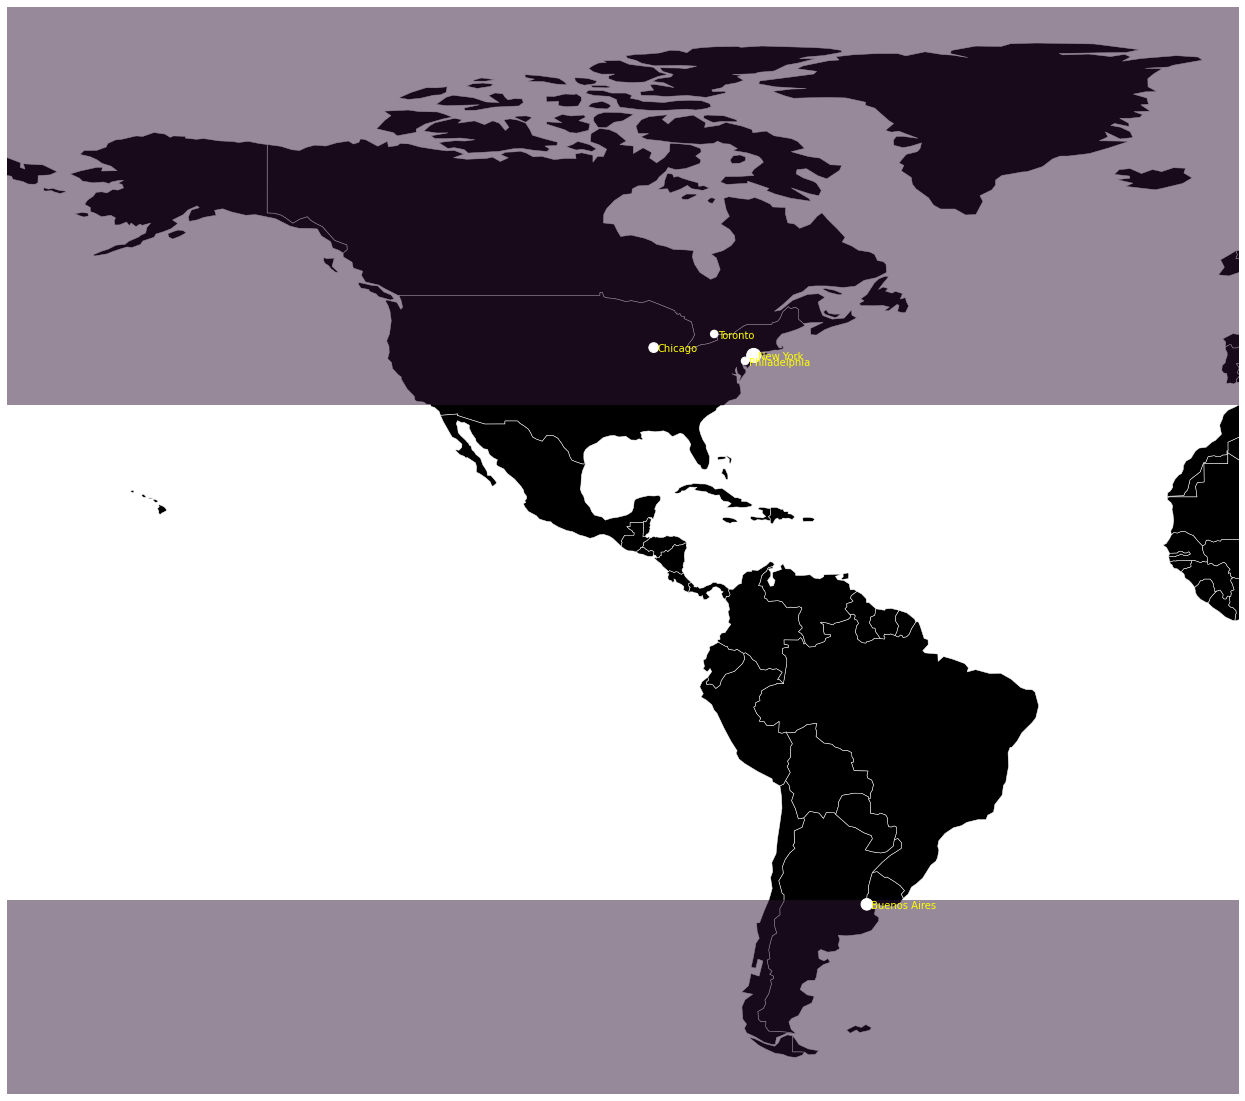

In [370]:
# top_five_americas = cities_of_interest_americas.sort_values('population', ascending = False)[:5]


# base = world.plot(color='black', linewidth=0.5, edgecolor='white', figsize=(24,20))
# aurora.plot(ax=base, cmap='twilight_shifted', alpha=0.5)
# top_five_americas.plot(ax=base, color='white', markersize = top_five_americas['population']/100)

# for x, y, label in zip(top_five_americas.geometry.x, top_five_americas.geometry.y, top_five_americas.city):
#     base.annotate(label, xy=(x, y), xytext=(4, -4), textcoords="offset points", color = 'yellow')

# bounds = Americas.geometry.bounds
# plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
# plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])
# base.set_axis_off()

<B> Map for Africa - Different colours depict the different population ranges. The sizes correspond to population sizes within these ranges

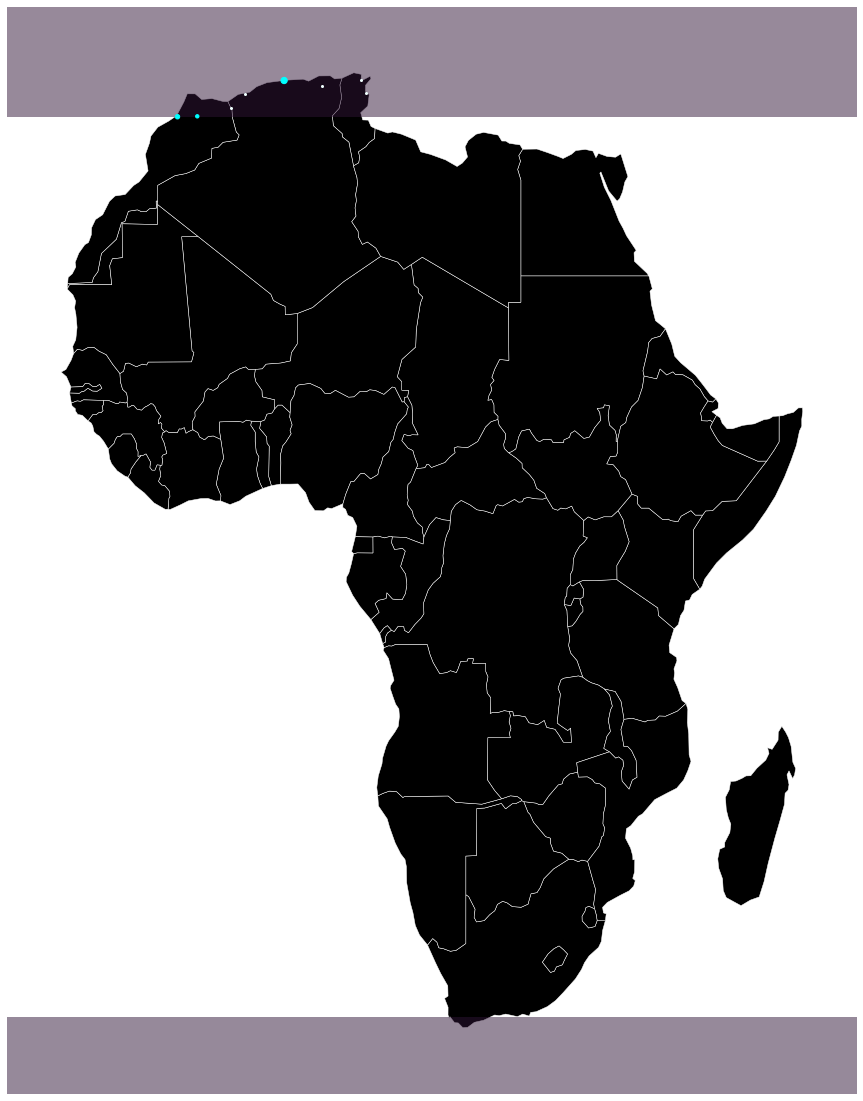

In [354]:
Africa = world[(world['continent'] == 'Africa')][['continent','name','geometry']]

cities_of_interest_africa = gpd.sjoin(cities_of_interest, Africa, how = 'inner', op = 'intersects')
cities_of_interest_africa = cities_of_interest_africa[['City','population','megacity','Aurora','continent','name','geometry']]
cities_of_interest_africa.columns = ['city','population','megacity','Aurora','continent','country','geometry']

coi_1k_africa = cities_of_interest_africa[(cities_of_interest_africa['population'] <= 1000)]
coi_10k_africa = cities_of_interest_africa[(cities_of_interest_africa['population'] > 1000) & (cities_of_interest_africa['population'] <= 10000)]
coi_m_africa = cities_of_interest_africa[cities_of_interest_africa['population'] > 10000]



base = Africa.plot(color='black', linewidth=0.5, edgecolor='white', figsize=(24,20))
aurora.plot(ax=base, cmap='twilight_shifted', alpha=0.5)
coi_1k_africa.plot(ax = base, color = 'azure', markersize = 4)
coi_10k_africa.plot(ax = base, color = 'cyan', markersize = coi_10k_africa['population']/100)
# coi_m_africa.plot(ax = base, color = 'gold', markersize = coi_m_africa['population']/100)
bounds = Africa.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])
base.set_axis_off()

<B> top five most populated cities where we might expect to see Auroras in Africa - since its a tropical continent, not many good choices

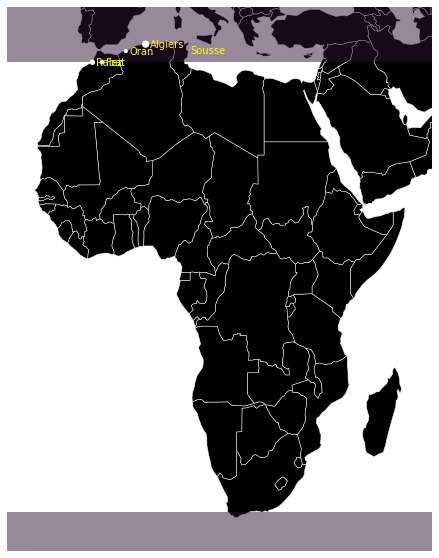

In [369]:
top_five_africa = cities_of_interest_africa.sort_values('population', ascending = False)[:5]


base = world.plot(color='black', linewidth=0.5, edgecolor='white', figsize=(15,10))
aurora.plot(ax=base, cmap='twilight_shifted', alpha=0.5)
top_five_africa.plot(ax=base, color='white', markersize = top_five_africa['population']/100)

for x, y, label in zip(top_five_africa.geometry.x, top_five_africa.geometry.y, top_five_africa.city):
    base.annotate(label, xy=(x, y), xytext=(4, -4), textcoords="offset points", color = 'yellow')

bounds = Africa.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])
base.set_axis_off()

<B> Map for Asia - Different colours depict the different population ranges. The sizes correspond to population sizes within these ranges

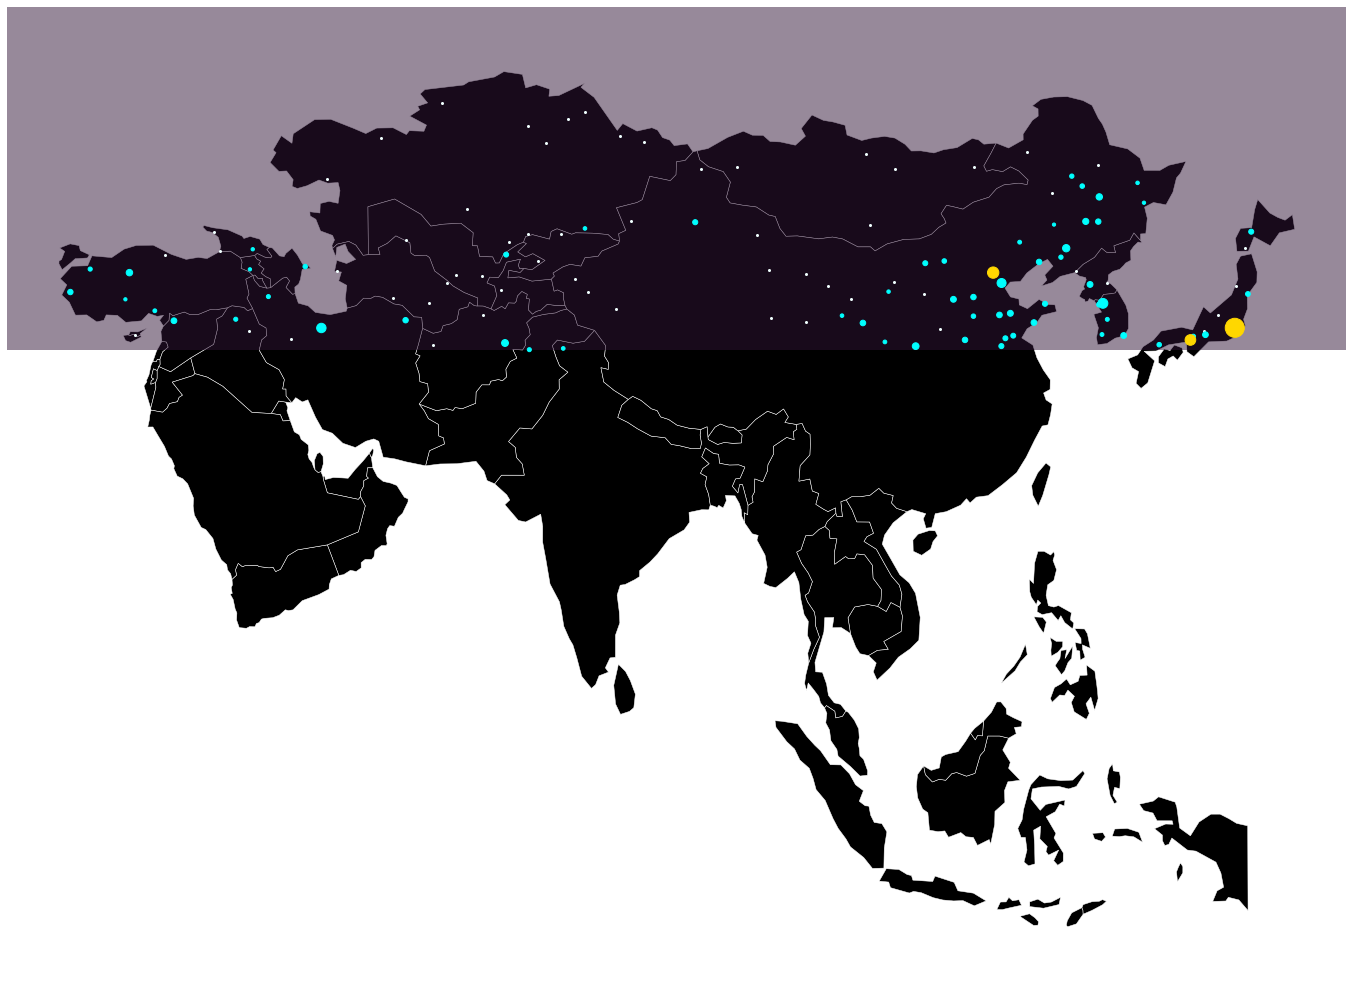

In [350]:
Asia = world[(world['continent'] == 'Asia')][['continent','name','geometry']]

cities_of_interest_asia = gpd.sjoin(cities_of_interest, Asia, how = 'inner', op = 'intersects')
cities_of_interest_asia = cities_of_interest_asia[['City','population','megacity','Aurora','continent','name','geometry']]
cities_of_interest_asia.columns = ['city','population','megacity','Aurora','continent','country','geometry']

coi_1k_asia = cities_of_interest_asia[(cities_of_interest_asia['population'] <= 1000)]
coi_10k_asia = cities_of_interest_asia[(cities_of_interest_asia['population'] > 1000) & (cities_of_interest_asia['population'] <= 10000)]
coi_m_asia = cities_of_interest_asia[cities_of_interest_asia['population'] > 10000]



base = Asia.plot(color='black', linewidth=0.5, edgecolor='white', figsize=(24,20))
aurora.plot(ax=base, cmap='twilight_shifted', alpha=0.5)
coi_1k_asia.plot(ax = base, color = 'azure', markersize = 4)
coi_10k_asia.plot(ax = base, color = 'cyan', markersize = coi_10k_asia['population']/100)
coi_m_asia.plot(ax = base, color = 'gold', markersize = coi_m_asia['population']/100)
bounds = Asia.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])
base.set_axis_off()

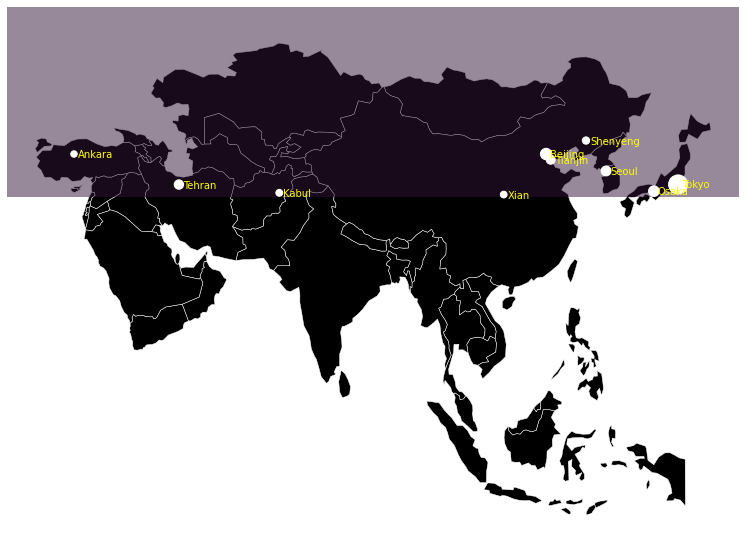

In [375]:
top_ten_asia = cities_of_interest_asia.sort_values('population', ascending = False)[:10]


base = Asia.plot(color='black', linewidth=0.5, edgecolor='white', figsize=(15,10))
aurora.plot(ax=base, cmap='twilight_shifted', alpha=0.5)
top_ten_asia.plot(ax=base, color='white', markersize = top_ten_asia['population']/100)

for x, y, label in zip(top_ten_asia.geometry.x, top_ten_asia.geometry.y, top_ten_asia.city):
    base.annotate(label, xy=(x, y), xytext=(4, -4), textcoords="offset points", color = 'yellow')

bounds = Asia.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])
base.set_axis_off()

<B> Map for Europe - Different colours depict the different population ranges. The sizes correspond to population sizes within these ranges. Best choice of location to catch the Aurora Borealis - the entire continent is within the viewing range

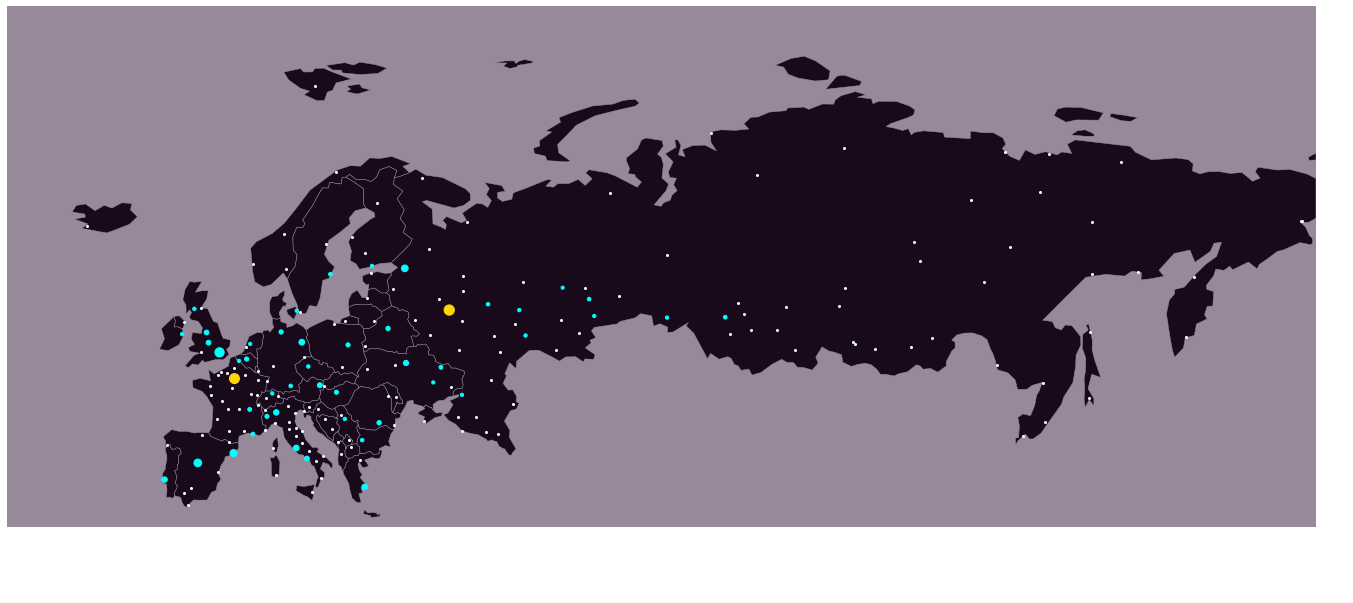

In [379]:
Europe = world[(world['continent'] == 'Europe')][['continent','name','geometry']]

cities_of_interest_europe = gpd.sjoin(cities_of_interest, Europe, how = 'inner', op = 'intersects')
cities_of_interest_europe = cities_of_interest_europe[['City','population','megacity','Aurora','continent','name','geometry']]
cities_of_interest_europe.columns = ['city','population','megacity','Aurora','continent','country','geometry']

coi_1k_europe = cities_of_interest_europe[(cities_of_interest_europe['population'] <= 1000)]
coi_10k_europe = cities_of_interest_europe[(cities_of_interest_europe['population'] > 1000) & (cities_of_interest_europe['population'] <= 10000)]
coi_m_europe = cities_of_interest_europe[cities_of_interest_europe['population'] > 10000]



base = Europe.plot(color='black', linewidth=0.5, edgecolor='white', figsize=(24,20))
aurora.plot(ax=base, cmap='twilight_shifted', alpha=0.5)
coi_1k_europe.plot(ax = base, color = 'azure', markersize = 4)
coi_10k_europe.plot(ax = base, color = 'cyan', markersize = coi_10k_europe['population']/100)
coi_m_europe.plot(ax = base, color = 'gold', markersize = coi_m_europe['population']/100)
# cities_of_interest_europe.plot(ax = base, color = 'cyan', markersize = cities_of_interest_europe['population']/100)

bounds = Europe.geometry.bounds
plt.xlim([bounds.minx.min()+145, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()+25, bounds.maxy.max()+5])
base.set_axis_off()

<B> Map for Australia and neighbors - Different colours depict the different population ranges. The sizes correspond to population sizes within these ranges

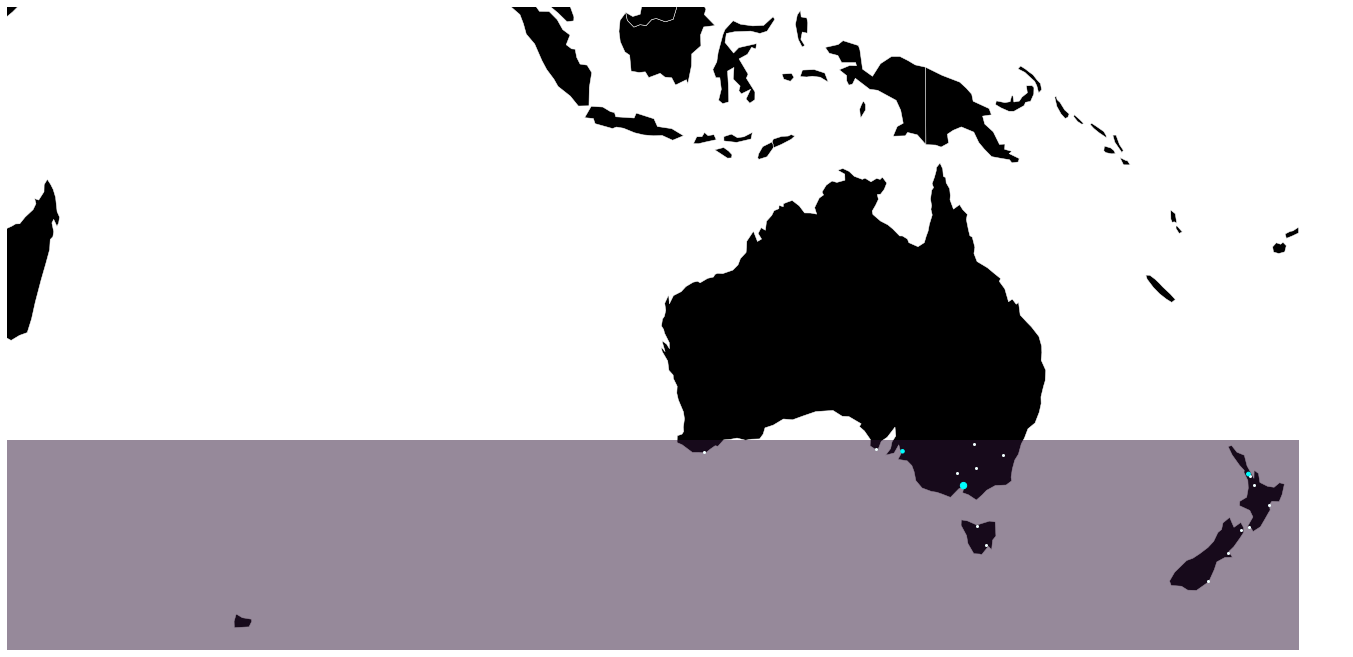

In [352]:
Oceania = world[(world['continent'] == 'Oceania')][['continent','name','geometry']]

cities_of_interest_oceania = gpd.sjoin(cities_of_interest, Oceania, how = 'inner', op = 'intersects')
cities_of_interest_oceania = cities_of_interest_oceania[['City','population','megacity','Aurora','continent','name','geometry']]
cities_of_interest_oceania.columns = ['city','population','megacity','Aurora','continent','country','geometry']

coi_1k_oceania = cities_of_interest_oceania[(cities_of_interest_oceania['population'] <= 1000)]
coi_10k_oceania = cities_of_interest_oceania[(cities_of_interest_oceania['population'] > 1000) & (cities_of_interest_oceania['population'] <= 10000)]
coi_m_oceania = cities_of_interest_oceania[cities_of_interest_oceania['population'] > 10000]



base = world.plot(color='black', linewidth=0.5, edgecolor='white', figsize=(24,20))
aurora.plot(ax=base, cmap='twilight_shifted', alpha=0.5)
coi_1k_oceania.plot(ax = base, color = 'azure', markersize = 4)
coi_10k_oceania.plot(ax = base, color = 'cyan', markersize = coi_10k_oceania['population']/100)
# coi_m_oceania.plot(ax = base, color = 'gold', markersize = coi_m_oceania['population']/100)
bounds = Oceania.geometry.bounds
plt.xlim([bounds.minx.min()+225, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])
base.set_axis_off()